#### Import modules

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from imutils.perspective import four_point_transform

#### Load the image

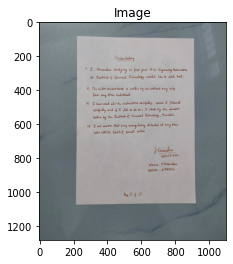

1098 1280


In [2]:
green = (0, 255, 0)
image = cv2.imread("Document.jpeg")
orig_image = image.copy()
y,x,_ = image.shape
plt.imshow(image)
plt.title("Image")
plt.show()
print(x,y)

#### Find the edges using Canny Algorithm

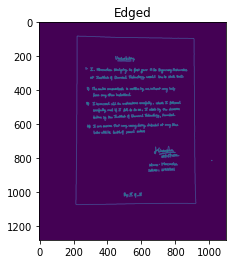

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert the image to gray scale
blur = cv2.GaussianBlur(gray, (5, 5), 0) # Add Gaussian blur
edged = cv2.Canny(blur, 75, 200) # Apply the Canny algorithm to find the edges

# Show the image and the edges
plt.imshow(edged)
plt.title("Edged")
plt.show()

#### Find the contours and sort them in decreasing order of area

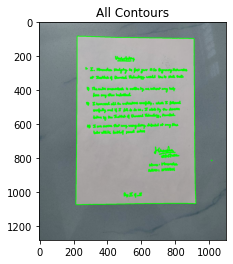

In [4]:
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
# Show the image and all the contours
cv2.drawContours(image, contours, -1, green, 3)
plt.imshow(image)
plt.title("All Contours")
plt.show()

#### Loop through contours to find 4-points contour

In [5]:
# go through each contour
for contour in contours:
    # we approximate the contour
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
    # if we found a countour with 4 points we break the for loop
    # (we can assume that we have found our document)
    if len(approx) == 4:
        doc_cnt = approx
        break

#### To reudce chances of bad scan, if the contour area is less than 25% of image area then image will not be scanned

In [6]:
img_cnt = np.zeros((4, 1, 2), dtype = "int32")
img_cnt[0] = np.array([[5,5]])
img_cnt[1] = np.array([[5,y-5]])
img_cnt[2] = np.array([[x-5,y-5]])
img_cnt[3] = np.array([[x-5,5]])

if cv2.contourArea(doc_cnt) >= 0.005*cv2.contourArea(img_cnt):
    opt_cnt = doc_cnt
else:
    opt_cnt = img_cnt

#### Draw the final contour on the original image

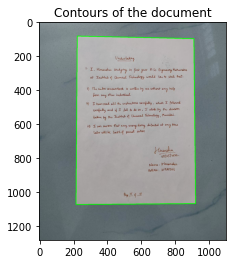

In [7]:
# We draw the contours on the original image not the modified one
cv2.drawContours(orig_image, [opt_cnt], -1, green, 3)
plt.imshow(orig_image)
plt.title("Contours of the document")
plt.show()

#### Apply warp perspective to get the top-down view

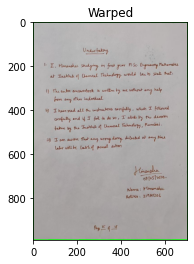

In [8]:
warped = four_point_transform(orig_image, opt_cnt.reshape(4,2))
plt.imshow(warped)
plt.title("Warped")
plt.show()

#### Convert the warped image to grayscale

In [9]:
grayed = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
cv2.imshow("Scanned", grayed)
cv2.waitKey(0)
cv2.destroyAllWindows()